## Import Necessary Libraries

## To create SVM model, I will need to follow below steps:
1. Import Necessary Libraries.
2. Load the image and convert it to a dataframe.
3. separate input features and targets.
4. Split train and test value.
5. Build and train the model.
6. Model evaluation.
7. Make prediction.


In [59]:
import os
import cv2                                       #OpenCV for image processing
import matplotlib.pyplot as plt                  #used to create visualisation and plotting information 
import pandas as pd                              #pandas used for working with datasets
import seaborn as sns                            #used for creating statistical graph
import numpy as np                               #used for numerical computations
import tensorflow as tf


from sklearn import datasets                                                         #Import scikit-learn dataset library
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC                                                           #Import Support Vector Machine
from sklearn.ensemble import RandomForestClassifier                                   #Import Random Forest 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   #For measuring accuracy
from skimage.feature import hog                                                       #Import Histogram for feature extraction
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.decomposition import PCA

In [70]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog
from skimage import exposure

# Load the dataset
def load_data(data_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(data_path)  # folder names are class labels
    for label in class_names:
        class_folder = os.path.join(data_path, label)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels), class_names

# Extract HOG features from the images
def extract_hog_features(images):
    features = []
    for img in images:
        fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(fd)
    return np.array(features)

# Load and preprocess data
train_data_path = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/train"
X, y, class_names = load_data(train_data_path)
X = X.astype('float32') / 255.0  # Normalize
X_features = extract_hog_features(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print("SVM Classifier Performance:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder

# Load the dataset
def load_data(data_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(data_path)  # folder names are class labels
    for label in class_names:
        class_folder = os.path.join(data_path, label)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels), class_names

# Extract HOG features from the images
def extract_hog_features(images):
    features = []
    for img in images:
        fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(fd)
    return np.array(features)

# Load and preprocess data (training, validation, and test sets)
train_data_path = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/train"
valid_data_path = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/valid"
test_data_path = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/test"

# Training dataset
X_train, y_train, _ = load_data(train_data_path)
X_train = X_train.astype('float32') / 255.0  # Normalize
X_train_features = extract_hog_features(X_train)

# Validation dataset
X_valid, y_valid, _ = load_data(valid_data_path)
X_valid = X_valid.astype('float32') / 255.0  # Normalize
X_valid_features = extract_hog_features(X_valid)

# Test dataset
X_test, y_test, _ = load_data(test_data_path)
X_test = X_test.astype('float32') / 255.0  # Normalize
X_test_features = extract_hog_features(X_test)

# Encode labels as numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)
y_pred_rf = rf_model.predict(X_test_features)

# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, y_train)
y_pred_svm = svm_model.predict(X_test_features)

# Evaluation for Random Forest
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Evaluation for SVM
print("SVM Classifier Performance:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


In [9]:
#Define image size and batch size
IMAGE_SIZE = 128
BATCH_SIZE = 32

In [11]:
# Load & Preprocess Data
def load_data(directory, target_size=(128, 128)):
    datagen = ImageDataGenerator(rescale=1./255)  # Normalize images
    dataset = datagen.flow_from_directory(
        directory, target_size=target_size, color_mode="rgb",
        batch_size=BATCH_SIZE, class_mode="sparse", shuffle=True
    )
    
    # Convert dataset to numpy arrays
    X, y = [], []
    for batch_x, batch_y in dataset:
        X.extend(batch_x)
        y.extend(batch_y)
        if len(X) >= dataset.samples:  #Stop when all images are loaded
            break
    
    return np.array(X), np.array(y)

In [39]:
# Keras image data loading (train)
training_dataset = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/train"

In [41]:
# Keras image data loading (valid)
validation_dataset = "/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/valid"

In [43]:
# Keras image data loading (test)
test_dataset = '/Users/nasrinjahan/Desktop/Indivisual Project/Project_NK/machineLearning_PlantDiseaseDetectionSystem/Plant_Diseases_Dataset/test'

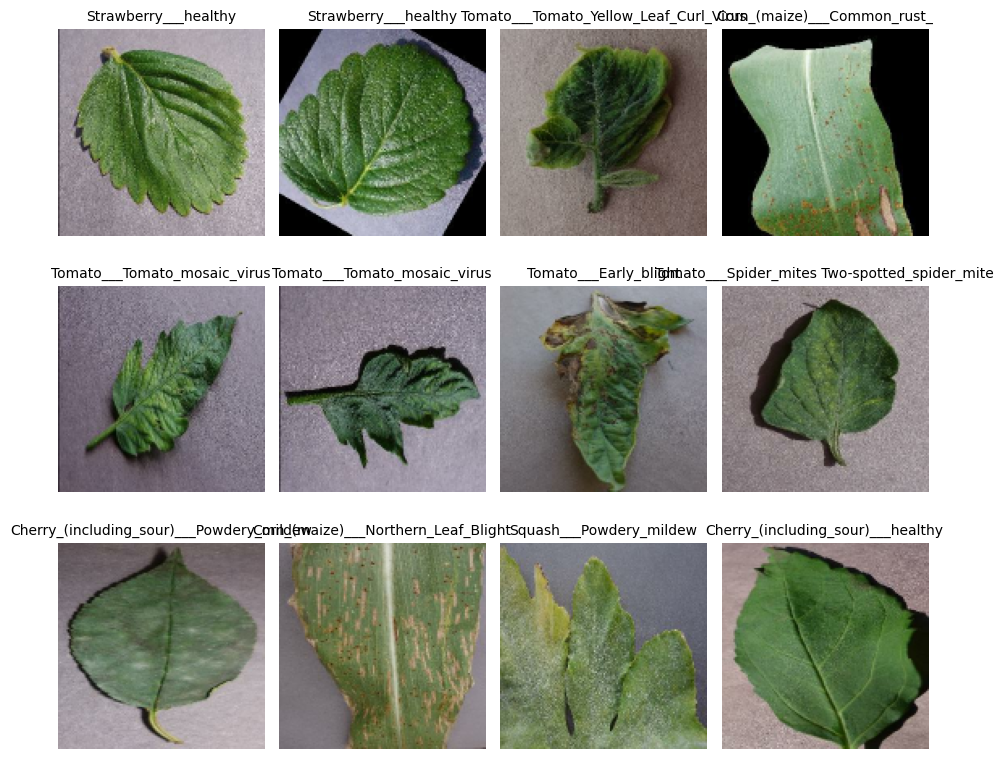

2025-02-28 00:15:06.765727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [31]:
for image_batch, label_batch in training_dataset.take(1):  # Take one batch
    plt.figure(figsize=(9, 8))  # Set figure size
    
    for i in range(12):  # Loop over first 12 images
        ax = plt.subplot(3, 4, i + 1)  # Create a subplot (3 rows, 4 columns)
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert tensor to image
        plt.title(class_names[np.argmax(label_batch[i].numpy())], fontsize = 10)  # Get class label
        plt.axis("off")  # Hide the axis ( x and y axis)
    
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show all images at together

In [45]:
# Load datasets
X_train, y_train = load_data(training_dataset)
X_test, y_test = load_data(test_dataset)
X_valid, y_valid = load_data(validation_dataset)

Found 70295 images belonging to 38 classes.
Found 33 images belonging to 1 classes.
Found 17572 images belonging to 38 classes.


In [55]:
# Flatten images for PCA (convert to 1D feature vectors)
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)
X_valid_flat = X_valid.reshape(len(X_valid), -1)

In [ ]:
#Apply PCA for Dimensionality Reduction
pca = PCA(n_components=100)  # 100 principal components
pca.fit(X_train_flat)

In [ ]:
pcX_train = pca.transform(X_train_flat)
pcX_test = pca.transform(X_test_flat)
pcX_valid = pca.transform(X_valid_flat)

## Resize and Rescale

In [ ]:
def preprocess_images(dataset):
    X, y = [], []
    for images, labels in dataset:
        for img, label in zip(images, labels):
            img = img.numpy() / 255.0                                         # Normalize the image
            img_resized = tf.image.resize(img, (128, 128)).numpy().squeeze()  # Resize the image from original size
            X.append(img_resized)
            y.append(label.numpy())
    return np.array(X), np.array(y)

# Apply preprocessing
X_train, y_train = preprocess_images(training_dataset)
X_test, y_test = preprocess_images(test_dataset)
X_valid, y_valid = preprocess_images(validation_dataset)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, Valid shape: {X_valid.shape}")

2025-02-27 23:50:22.067861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:103: Filling up shuffle buffer (this may take a while): 734 of 1000
2025-02-27 23:50:25.898324: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-02-27 23:54:43.161009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Convert Dataset to NumPy array

In [86]:
def dataset_to_numpy(dataset):
    images, labels = [], []
    
    for img_batch, label_batch in dataset:
        images.extend(img_batch.numpy())  # Convert images to numpy
        labels.extend(label_batch.numpy())  # Convert labels to numpy

    return np.array(images), np.array(labels)

# Convert train, validation, and test datasets
X_train, y_train = dataset_to_numpy(training_dataset)
X_valid, y_valid = dataset_to_numpy(validation_dataset)
X_test, y_test = dataset_to_numpy(test_dataset)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_valid.shape}, Labels: {y_valid.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")


2025-02-27 01:18:16.347234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-27 01:19:52.340555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Data: (70295, 128, 128, 3), Labels: (70295, 38)
Validation Data: (17572, 128, 128, 3), Labels: (17572, 38)
Test Data: (33, 128, 128, 3), Labels: (33, 1)


2025-02-27 01:20:02.145353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Define the Functions and extract HOG features

In [89]:
def extract_hog_features(images):
    features = []
    for img in images:
        feature_vector, _ = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        features.append(feature_vector)
    return np.array(features)

# Extract HOG features
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)
X_valid_hog = extract_hog_features(X_valid)

# Standardizing features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)
X_valid_hog = scaler.transform(X_valid_hog)

print("Feature extraction complete. Shape:", X_train_hog.shape)

KeyboardInterrupt: 

## Train and Evaluate SVM Model

In [ ]:
# Train SVM model
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_train_hog, y_train)

# Evaluate SVM
svm_preds = svm_model.predict(X_test_hog)
print("SVM Model Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Classification Report:\n", classification_report(y_test, svm_preds, target_names=class_names))


## Random Forest Model

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_hog, y_train)

# Evaluate Random Forest
rf_preds = rf_model.predict(X_test_hog)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds, target_names=class_labels))

## Visualise the model predictions

In [ ]:
def plot_predictions(images, labels, preds, class_labels, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"True: {class_labels[labels[i]]}\nPred: {class_labels[preds[i]]}")
        plt.axis("off")
    plt.show()

# Select some test samples
num_samples = 5
X_sample, y_sample = X_test[:num_samples], y_test[:num_samples]

# Extract HOG features for visualization
X_sample_hog = extract_hog_features(X_sample)
X_sample_hog = scaler.transform(X_sample_hog)

# Predict using SVM
svm_preds_vis = svm_model.predict(X_sample_hog)
plot_predictions(X_sample, y_sample, svm_preds_vis, class_labels)

# Predict using Random Forest
rf_preds_vis = rf_model.predict(X_sample_hog)
plot_predictions(X_sample, y_sample, rf_preds_vis, class_labels)
